In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For loading the excel data
import pandas as pd

#For numerical operations
import numpy as np

#For regular expressions. easy to access complicated patterns
import re


#Machine learning package
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#machine learning metrics such as precision, recall ,accuracy
from sklearn.metrics import r2_score

# Statsmodels is used to explore data, estimate statistical models and perform statistical tests
import statsmodels
import statsmodels.api as sm

## Feature selection
from sklearn.feature_selection import f_regression,SelectKBest,SelectFromModel,mutual_info_regression,RFE,VarianceThreshold
from sklearn.model_selection import GridSearchCV

# seaborn and matplotlib  packages are  used for visualization
import seaborn as sns
import matplotlib.pyplot as plt


<a id='set_options'></a>
## 2. Setting Options

In [3]:
pd.options.display.max_columns = None


<a id='Read_Data'></a>
## 3. Read Data

In [7]:
# Reading the data from csv
data=pd.read_excel("/content/phone_dataset++_281_29.xlsx")

In [8]:
# getting all brands
brands=data['brand'].unique()


In [9]:
brands

array(['Acer', 'alcatel', 'Allview', 'Amazon', 'Amoi', 'Apple', 'Archos',
       'Asus', 'AT&T', 'Benefon', 'BenQ', 'BenQ-Siemens', 'Bird',
       'BlackBerry', 'BLU', 'Bosch', 'BQ', 'Casio', 'Cat', 'Celkon',
       'Chea', 'Coolpad', 'Dell', 'Emporia', 'Energizer', 'Ericsson',
       'Eten', 'Fujitsu Siemens', 'Garmin-Asus', 'Gigabyte', 'Gionee',
       'Google', 'Haier', 'HP', 'HTC', 'Huawei', 'i-mate', 'i-mobile',
       'Icemobile', 'Innostream', 'iNQ', 'Intex', 'Jolla', 'Karbonn',
       'Kyocera', 'Lava', 'LeEco', 'Lenovo', 'LG', 'Maxon', 'Maxwest',
       'Meizu', 'Micromax', 'Microsoft', 'Mitac', 'Mitsubishi', 'Modu',
       'Motorola', 'MWg', 'NEC', 'Neonode', 'NIU', 'Nokia', 'Nvidia',
       'O2', 'OnePlus', 'Oppo', 'Orange', 'Palm', 'Panasonic', 'Pantech',
       'Parla', 'Philips', 'Plum', 'Posh', 'Prestigio', 'QMobile', 'Qtek',
       'Sagem', 'Samsung', 'Sendo', 'Sewon', 'Sharp', 'Siemens', 'Sonim',
       'Sony', 'Sony Ericsson', 'Spice', 'T-Mobile', 'Tel.Me.', 'Telit',


In [10]:
data.head()

# Note: In order to display more rows, example 10, use head(10). default number of records returned by head() is 5

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,Available. Released 2016 December,-,NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,NaN,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofoc

<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<a id='Data_Understanding'></a>
### 4.1 Understanding the Dataset

In [11]:
data.shape

(8631, 40)

In [12]:
data.columns

Index(['brand', 'model', 'network_technology', '2G_bands', '3G_bands',
       '4G_bands', 'network_speed', 'GPRS', 'EDGE', 'announced', 'status',
       'dimentions', 'weight_g', 'weight_oz', 'SIM', 'display_type',
       'display_resolution', 'display_size', 'OS', 'CPU', 'Chipset', 'GPU',
       'memory_card', 'internal_memory', 'RAM', 'primary_camera',
       'secondary_camera', 'loud_speaker', 'audio_jack', 'WLAN', 'bluetooth',
       'GPS', 'NFC', 'radio', 'USB', 'sensors', 'battery', 'colors',
       'approx_price_EUR', 'img_url'],
      dtype='object')

 Total number of data points are  8631  we have 40 columns.


<a id='Data_Types'></a>
### 4.1.1 Data Types
The main data types in Pandas dataframes are object, float, int64, bool and datetime64. In order to understand each attribute of our data, it is always good for us to know the data type of each column

In [13]:
data.dtypes

,0
brand,object
model,object
network_technology,object
2G_bands,object
3G_bands,object
4G_bands,object
network_speed,object
GPRS,object
EDGE,object
announced,object


In [14]:
data.columns

Index(['brand', 'model', 'network_technology', '2G_bands', '3G_bands',
       '4G_bands', 'network_speed', 'GPRS', 'EDGE', 'announced', 'status',
       'dimentions', 'weight_g', 'weight_oz', 'SIM', 'display_type',
       'display_resolution', 'display_size', 'OS', 'CPU', 'Chipset', 'GPU',
       'memory_card', 'internal_memory', 'RAM', 'primary_camera',
       'secondary_camera', 'loud_speaker', 'audio_jack', 'WLAN', 'bluetooth',
       'GPS', 'NFC', 'radio', 'USB', 'sensors', 'battery', 'colors',
       'approx_price_EUR', 'img_url'],
      dtype='object')

[]

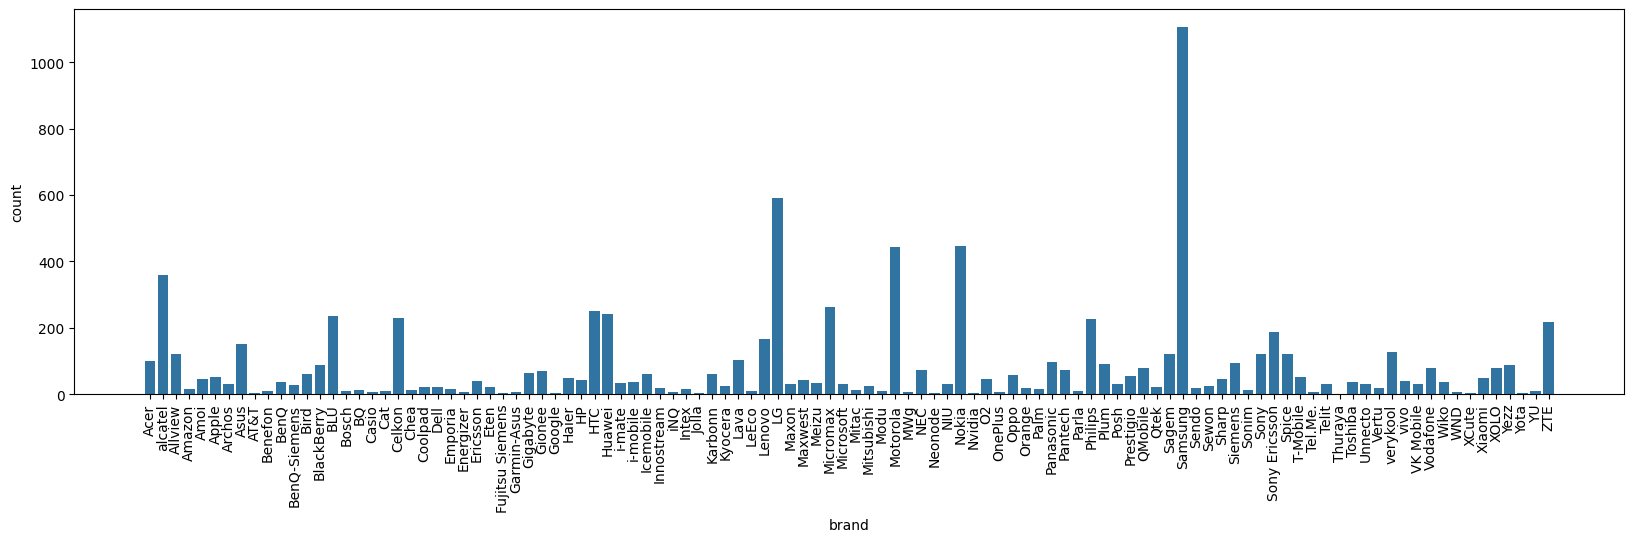

In [15]:
# Below plot shows the different brand names and no of phones
plt.figure(figsize=(20,5))
sns.countplot(x=data['brand'])
plt.xticks(rotation=90)
plt.plot()

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

In [16]:
data.describe()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
count,8631,8631,8631,8631,4858,1605,4885,8599,8608,8616,8631,8612,7682,7679.00,8628,8627,7417,8584,4908,4836,3692,3493,8629,6809,4658,7438,7407,8630,8563,8627,8612,8602,795,8535,7728,4591,8628,8029,5006,8631
unique,108,8275,38,209,579,627,195,53,51,711,135,6609,893,386.00,86,235,2981,864,553,558,538,139,204,395,211,673,369,20,7,173,111,96,51,97,101,115,1050,2615,112,8349
top,Samsung,X500,GSM,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 2100,LTE,HSPA 21.1/5.76 Mbps,Yes,Yes,2005 1Q,Discontinued,-,90,3.17,Mini-SIM,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 4.4.2 (KitKat),Quad-core 1.3 GHz Cortex-A7,Qualcomm MSM8916 Snapdragon 410,Mali-400,No,8 GB,1 GB RAM,2 MP,No,Yes,Yes,No,No,No,Yes,No,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion battery,Black,70,http://cdn2.gsmarena.com/vv/bigpic/htc-one-m8.jpg
freq,1105,5,3507,2257,1115,173,751,3549,3245,151,3637,331,186,193.00,4449,1644,57,485,481,365,123,401,2124,919,1449,788,3263,6557,5055,3826,1613,4086,668,3490,3398,1138,720,2023,302,5


## Finding the Null values/ missing values from the data

<a id='Missing_Values'></a>
### 4.1.3 Missing Values

In [17]:
data.isna().sum()

,0
brand,0
model,0
network_technology,0
2G_bands,0
3G_bands,3773
4G_bands,7026
network_speed,3746
GPRS,32
EDGE,23
announced,15


<a id='Data_Preparation'></a>
## 4.2 Data Preparation

In [18]:
pd.value_counts( data['dimentions'])

/tmp/ipython-input-2442734575.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts( data['dimentions'])


,count
dimentions,
-,331
108 x 46 x 15.3 mm (4.25 x 1.81 x 0.60 in),12
102 x 44 x 18 mm (4.02 x 1.73 x 0.71 in),8
76 x 44 x 23 mm (2.99 x 1.73 x 0.91 in),8
68 x 39 x 22 mm (2.68 x 1.54 x 0.87 in),8
...,...
108.5 x 46.8 x 13.3 mm (4.27 x 1.84 x 0.52 in),1
103 x 49 x 14.8 mm (4.06 x 1.93 x 0.58 in),1
112 x 57 x 12.5 mm (4.41 x 2.24 x 0.49 in),1


Dimensions columns has 331 "-" values replace them with NaN

In [19]:
data['dimentions'].replace("-",np.nan,inplace=True)

/tmp/ipython-input-3842661399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dimentions'].replace("-",np.nan,inplace=True)


There are so many missing values in every column. one of the reasons is  some companies do not provide corresponding  particular features like Iphones don't have FM Radio feature.

The main challenge here is finding a way to impute the null values because either that feature may not exist in that phone or the data is not available.

Some Columns like Primary camera, secondary camera dont have details in sync. for example in primary camera column has few details on mega pixels but other columns have tags on just the presence of a feature which leads to inconsistency in data format






In [20]:
# Finding the number of null values for every brand with  corresponding columns
data.groupby('brand').apply(lambda x: x.isna().sum()).head(10)

/tmp/ipython-input-1767276653.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('brand').apply(lambda x: x.isna().sum()).head(10)


,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT&T,0,0,0,0,1,4,1,0,0,0,0,0,1,1,0,0,1,0,1,1,3,4,0,1,2,0,0,0,0,0,0,0,4,0,0,4,0,0,4,0
Acer,0,0,0,0,23,79,22,0,0,0,0,2,7,7,0,0,0,0,0,1,10,19,0,2,3,0,4,0,0,0,0,2,93,0,0,5,1,0,5,0
Allview,0,0,0,0,16,79,15,0,0,0,0,0,6,6,0,0,0,0,5,2,39,10,0,6,5,1,1,0,2,0,7,7,117,1,0,4,0,0,56,0
Amazon,0,0,0,0,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,2,2,0,0,0,0,0,13,0,0,0,0,0,0,0
Amoi,0,0,0,0,36,47,35,0,3,0,0,0,13,13,0,0,10,0,42,46,47,47,0,14,46,14,14,0,0,0,0,0,47,0,9,47,0,10,47,0
Apple,0,0,0,0,20,28,20,0,0,0,0,0,0,0,0,0,0,0,0,2,3,10,0,6,7,16,16,0,0,1,0,0,26,0,0,0,0,0,0,0
Archos,0,0,0,0,0,15,0,0,0,0,0,2,4,4,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,18,0
Asus,0,0,0,0,52,91,50,0,0,2,0,1,7,8,1,0,1,0,12,15,24,34,0,5,15,4,4,0,0,0,0,0,132,2,0,26,0,1,24,0
BLU,0,0,0,0,61,189,61,0,0,0,0,1,4,4,0,0,0,14,57,57,97,60,0,3,22,5,5,0,0,0,0,0,232,6,0,58,0,0,132,0


In [21]:
data[data['brand']=='Asus']

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
722,Asus,Zenpad 3 8.0 Z582KL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 850 / 900 / 2100,LTE,HSPA 42.2/5.76 Mbps LTE-A (2CA) Cat6 300/50 Mbps,Yes,Yes,2017 May,Coming soon. Exp. release 2017 July,6.9 mm thickness,NaN,NaN,Micro-SIM,IPS LCD capacitive touchscreen 16M colors,7.9 inches,1536 x 2048 pixels (~324 ppi pixel density),Android 7.1 (Nougat),Octa-core (4x1.8 GHz Cortex-A72 & 4x1.4 GHz Co...,Qualcomm MSM8976 Snapdragon 652,Adreno 510,microSD up to 256 GB,32 GB,3 GB RAM or 64 GB| 4 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| WiFi Direc...,4.1| A2DP| LE| aptX,Yes with A-GPS GLONASS,NaN,No,Type-C 1.0 reversible connector,Accelerometer| gyro| proximity| compass,Non-removable Li-Ion 4680 mAh battery (18 Wh),Black,390,http://cdn2.gsmarena.com/vv/bigpic/asus-zenpad...
723,Asus,Zenfone Go ZB552KL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1900 / 2100 - Global,LTE band 1(2100)| 2(1900)| 3(1800)| 5(850)| 7(...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2017 May,Available. Released 2017 May,153.4 x 76.4 x 10.9 mm (6.04 x 3.01 x 0.43 in),168,5.93,Dual SIM (Micro-SIM| dual stand-by),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.2% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.2 GHz Cortex-A53,Qualcomm MSM8916 Snapdragon 410,Adreno 306,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| f/2.0| autofocus| dual-LED (dual tone) ...,5 MP| f/2.0| autofocus,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP| EDR,Yes with A-GPS GLONASS BDS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Non-removable Li-Ion 3000 mAh battery,Charcoal Black| Pearl White| Glamor Red| Sheer...,NaN,http://cdn2.gsmarena.com/vv/bigpic/asus-zenfon...
724,Asus,Zenfone Live ZB501KL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 900 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2017 February,Available. Released 2017 March,141.2 x 71.7 x 8 mm (5.56 x 2.82 x 0.31 in),120,4.23,Dual SIM (Nano-SIM| dual stand-by),IPS LCD capacitive touchscreen 16M colors,5.0 inches (~68.1% screen-to-body ratio),720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.2 GHz Cortex-A53,Qualcomm MSM8916 Snapdragon 410,Adreno 306,microSD up to 256 GB (uses SIM 2 slot),16/32 GB,2 GB RAM,13 MP| f/2.0| autofocus| LED flash,5 MP| f/2.2| 1.4 Âµm pixel size| autofocus| LE...,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Non-removable Li-Ion 2650 mAh battery,Shimmer Gold/Rose| Pink/Navy Black,150,http://cdn2.gsmarena.com/vv/bigpic/asus-zenfon...
725,Asus,Zenfone 3s Max ZC521TL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1900 / 2100 - Global,LTE band 1(2100)| 2(1900)| 3(1800)| 4(1700/210...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2017 January,Available. Released 2017 February,8.9 mm thickness,175,5.22,Dual SIM (Micro-SIM/Nano-SIM| dual stand-by),IPS LCD capacitive touchscreen 16M colors,5.2 inches,720 x 1280 pixels (~282 ppi pixel density),Android 7.0 (Nougat),Octa-core 1.5 GHz Cortex-A53,Mediatek MT6750,Mali-T860MP2,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| f/2.0| autofocus| dual-LED (dual tone) ...,8 MP,Yes,Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| WiFi Direc...,4.0| A2DP| EDR,Yes with A-GPS GLONASS BDS,NaN,FM radio,microUSB 2.0| USB On-The-Go,Fingerprint (front-mounted)|

In [22]:
## for the below models and brand values from weight_oz columns, the values are misplaced
model_names=["Google Nexus 7 (2013)","Galaxy Tab A 9.7","E1120"]
brand=["Asus","Samsung"]
temp_df=data[data['model'].isin(model_names) & data['brand'].isin(brand) ].loc[:,'weight_oz':].copy()
temp_df

,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
819,NaN,NaN,Micro-SIM,LED-backlit IPS LCD capacitive touchscreen 16...,7.0 inches (~62.3% screen-to-body ratio),1200 x 1920 pixels (~323 ppi pixel density),Android 4.3 (Jelly Bean)| upgradable to 6.0 (M...,Quad-core 1.5 GHz Krait,Qualcomm Snapdragon S4Pro,Adreno 320,No,16/32 GB,2 GB RAM,5 MP| f/2.4| autofocus,1.2 MP,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n| dual-band,4.0| A2DP| LE,Yes with A-GPS,Yes,No,microUSB 2.0 (SlimPort),Accelerometer| gyro| proximity| compass,Non-removable Li-Ion 3950 mAh battery,Black,230
6058,NaN,NaN,Micro-SIM,TFT capacitive touchscreen 16M colors,9.7 inches (~72.0% screen-to-body ratio),768 x 1024 pixels (~132 ppi pixel density),Android 5.0 (Lollipop)| upgradable to 6.0.1 (M...,Quad-core 1.2 GHz,NaN,NaN,microSD up to 256 GB (dedicated slot),16 GB,1.5 GB RAM (Wi-Fi),5 MP| autofocus,2 MP,Yes dual speakers,Yes,Wi-Fi 802.11 a/b/g/n| dual-band| WiFi Direct| ...,4.1| A2DP,Yes with A-GPS GLONASS,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion 6000 mAh battery,Smoky Titanium| Smoky Blue| White,250
6661,NaN,2.33,Mini-SIM,CSTN 65K colors,1.52 inches (~16.4% screen-to-body ratio),128 x 128 pixels (~119 ppi pixel density),NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,No,No,No,No,NaN,No,No,NaN,Removable Li-Ion 800 mAh battery,Gray,30


In [23]:
wrong_columns_fixed=temp_df.shift(-1,axis=1)
data.update(wrong_columns_fixed)
data.loc[[819,6058,6661],"approx_price_EUR"]=[230,250,30]
data[data['model'].isin(model_names) & data['brand'].isin(brand) ].loc[:,'weight_oz':]

,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
819,NaN,Micro-SIM,LED-backlit IPS LCD capacitive touchscreen 16...,7.0 inches (~62.3% screen-to-body ratio),1200 x 1920 pixels (~323 ppi pixel density),Android 4.3 (Jelly Bean)| upgradable to 6.0 (M...,Quad-core 1.5 GHz Krait,Qualcomm Snapdragon S4Pro,Adreno 320,No,16/32 GB,2 GB RAM,5 MP| f/2.4| autofocus,1.2 MP,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n| dual-band,4.0| A2DP| LE,Yes with A-GPS,Yes,No,microUSB 2.0 (SlimPort),Accelerometer| gyro| proximity| compass,Non-removable Li-Ion 3950 mAh battery,Black,230,230
6058,NaN,Micro-SIM,TFT capacitive touchscreen 16M colors,9.7 inches (~72.0% screen-to-body ratio),768 x 1024 pixels (~132 ppi pixel density),Android 5.0 (Lollipop)| upgradable to 6.0.1 (M...,Quad-core 1.2 GHz,Quad-core 1.2 GHz,NaN,microSD up to 256 GB (dedicated slot),16 GB,1.5 GB RAM (Wi-Fi),5 MP| autofocus,2 MP,Yes dual speakers,Yes,Wi-Fi 802.11 a/b/g/n| dual-band| WiFi Direct| ...,4.1| A2DP,Yes with A-GPS GLONASS,Yes with A-GPS GLONASS,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion 6000 mAh battery,Smoky Titanium| Smoky Blue| White,250,250
6661,2.33,Mini-SIM,CSTN 65K colors,1.52 inches (~16.4% screen-to-body ratio),128 x 128 pixels (~119 ppi pixel density),128 x 128 pixels (~119 ppi pixel density),NaN,NaN,NaN,No,No,NaN,NaN,NaN,Yes,No,No,No,No,No,No,No,No,Removable Li-Ion 800 mAh battery,Gray,30,30


In [24]:
# filling the null values based on top value top/mode value of the corresponding brand
#
for i in brands:
    na_columns_brand=data.columns[data[data['brand']==i].isna().any()]
    fillna_values=data[data['brand']==i].describe().loc['top',na_columns_brand]
    data[data['brand']==i]=data[data['brand']==i].fillna(fillna_values)

/tmp/ipython-input-2435805587.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data['brand']==i]=data[data['brand']==i].fillna(fillna_values)
/tmp/ipython-input-2435805587.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data['brand']==i]=data[data['brand']==i].fillna(fillna_values)
/tmp/ipython-input-2435805587.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option

In [25]:
data.isna().sum()

,0
brand,0
model,0
network_technology,0
2G_bands,0
3G_bands,320
4G_bands,1745
network_speed,320
GPRS,0
EDGE,0
announced,0


In [26]:
## Now remaining null values will be filled with top values of the entire data frame
columns=['model','img_url','announced','status','weight_oz']
data.drop(columns=columns,inplace=True)
na_columns=data.columns[data.isna().any()]
for i in na_columns:
    top_value_column=data.describe().loc["top",i]
    data[i]=data[i].fillna(top_value_column)

/tmp/ipython-input-3268653220.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i]=data[i].fillna(top_value_column)


In [27]:
data.isna().any()

,0
brand,False
network_technology,False
2G_bands,False
3G_bands,False
4G_bands,False
network_speed,False
GPRS,False
EDGE,False
dimentions,False
weight_g,False


As can be seen above we have got rid of missing values in our dataframe

We have plenty of ways too impute missing values for more details:

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [28]:
## Using network technology column we will add more features to our dataframe as binary categories

total_list=[]
# print(default_values)
def network_technology(x):
    default_values=dict(zip(["GSM","HSPA", "LTE", "UMTS", "EVDO", "CDMA","CDMA2000","No cellular connectivity"],["NO","NO","NO","NO","NO","NO","NO","NO"]))
    networks=x.split('/')
    for i in networks:
        i=i.strip()
        default_values[i]="YES"

    return default_values


seri=data['network_technology'].apply(lambda x:network_technology(x))
network_types=pd.DataFrame(list(seri),dtype='str')

data=data.merge(network_types,right_index=True,left_index=True)
# data_new.drop(columns=['network_technology'],inplace=True)
# data_new.head()

In [29]:
## based on sim column we will add more columns as dual sim supported, Micro sim supported and so on

li=["Dual SIM","Micro-SIM","dual stand-by","Nano-SIM","Mini-SIM","dual active"]
values=["NO","NO","NO","NO","NO","NO"]
def SIMdetails(string):
    default_values=dict(zip(li,values))
    if string =="No":
        return default_values
    else:
        features=[x for x in li  if x in string]
        for i in features:
            default_values[i]="YES"
        return default_values

seri=data['SIM'].apply(lambda string:SIMdetails(string))
SIM_types=pd.DataFrame(list(seri),dtype='str')

# Now replacing all sim type to YES

# data_new[~data_new['SIM']=="No"].replace("Yes")
data=data.merge(SIM_types,right_index=True,left_index=True)
# data_new

In [30]:
data.head()

,brand,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260.0,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,NO,YES,NO,NO
1,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169.0,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
2,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,136 x 66.5 x 9.6 mm (5.35 x 2.62 x 0.38 in),145.0,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,Acer,No cellular connectivity,N/A,HSDPA 900 / 2100,LTE,HSPA,No,No,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),145.0,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,Yes with A-GPS,Yes,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166.0,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity| c

In [31]:
#Separating Feature and Target
Feature=data.drop(columns=['approx_price_EUR'])
Target=data['approx_price_EUR'].astype('int')

In [32]:
Feature.shape,Target.shape


((8631, 48), (8631,))

In [33]:
Feature=Feature.astype('str')

In [34]:
## We can remove network_technology, SIM columns as we have extracted the info already
Feature.drop(columns=['network_technology','SIM'],inplace=True)
Feature.head()

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,Acer,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260.0,IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,NO,YES,NO,NO
1,Acer,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169.0,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
2,Acer,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,136 x 66.5 x 9.6 mm (5.35 x 2.62 x 0.38 in),145.0,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,Acer,N/A,HSDPA 900 / 2100,LTE,HSPA,No,No,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),145.0,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,Yes with A-GPS,Yes,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,Acer,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166.0,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,YES,YES,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO


<a id='ShapiroWilkTest'></a>
### 4.2.2 Shapiro Wilk Test

The null and alternate hypothesis of Shapiro Wilk test are as follows: <BR>
**Ho: The data is normally distributed**</BR><BR>
**Ha: The data is not normally distributed**</BR>

In [35]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(Target)

# To print the numeric outputs of the shapiro test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.123, p-value=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8631.
  res = hypotest_fun_out(*samples, **kwds)


### It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.

<a id='Log_Transform'></a>
### 4.2.3 Log Transform

The log transformation can be used to make highly skewed distributions less skewed.

In [36]:
# log transformation for normality
Target = np.log(Target)


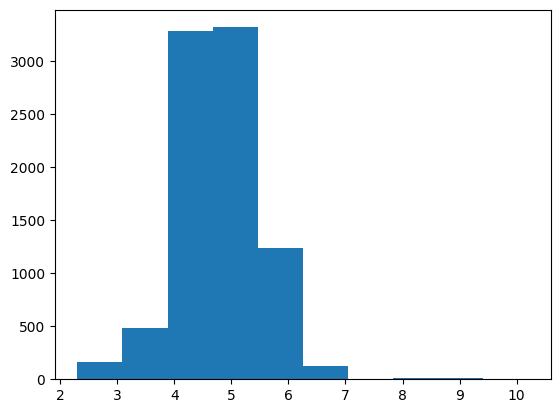

In [37]:
# recheck for normality
# display histogram of the data
plt.hist(Target)

# to display on the histogram
plt.show()

In [38]:
#rechecking normality by Shapiro Wilk test
statn, pv = shapiro(Target)
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))

# interpret
alpha = 0.05
if pv > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.967, p-value=0.000
Sample does not look Gaussian (reject H0)


## As Machine learning algorithms don't work with string data, we convert it into Numbers using oneHot encoder


<a id='dummy'></a>
### 4.2.4 One Hot encoding of Categorical Variables

In [39]:
lab1=LabelEncoder()
Feature_onehot=Feature.apply(lab1.fit_transform)

In [40]:
Feature_onehot.shape

(8631, 46)

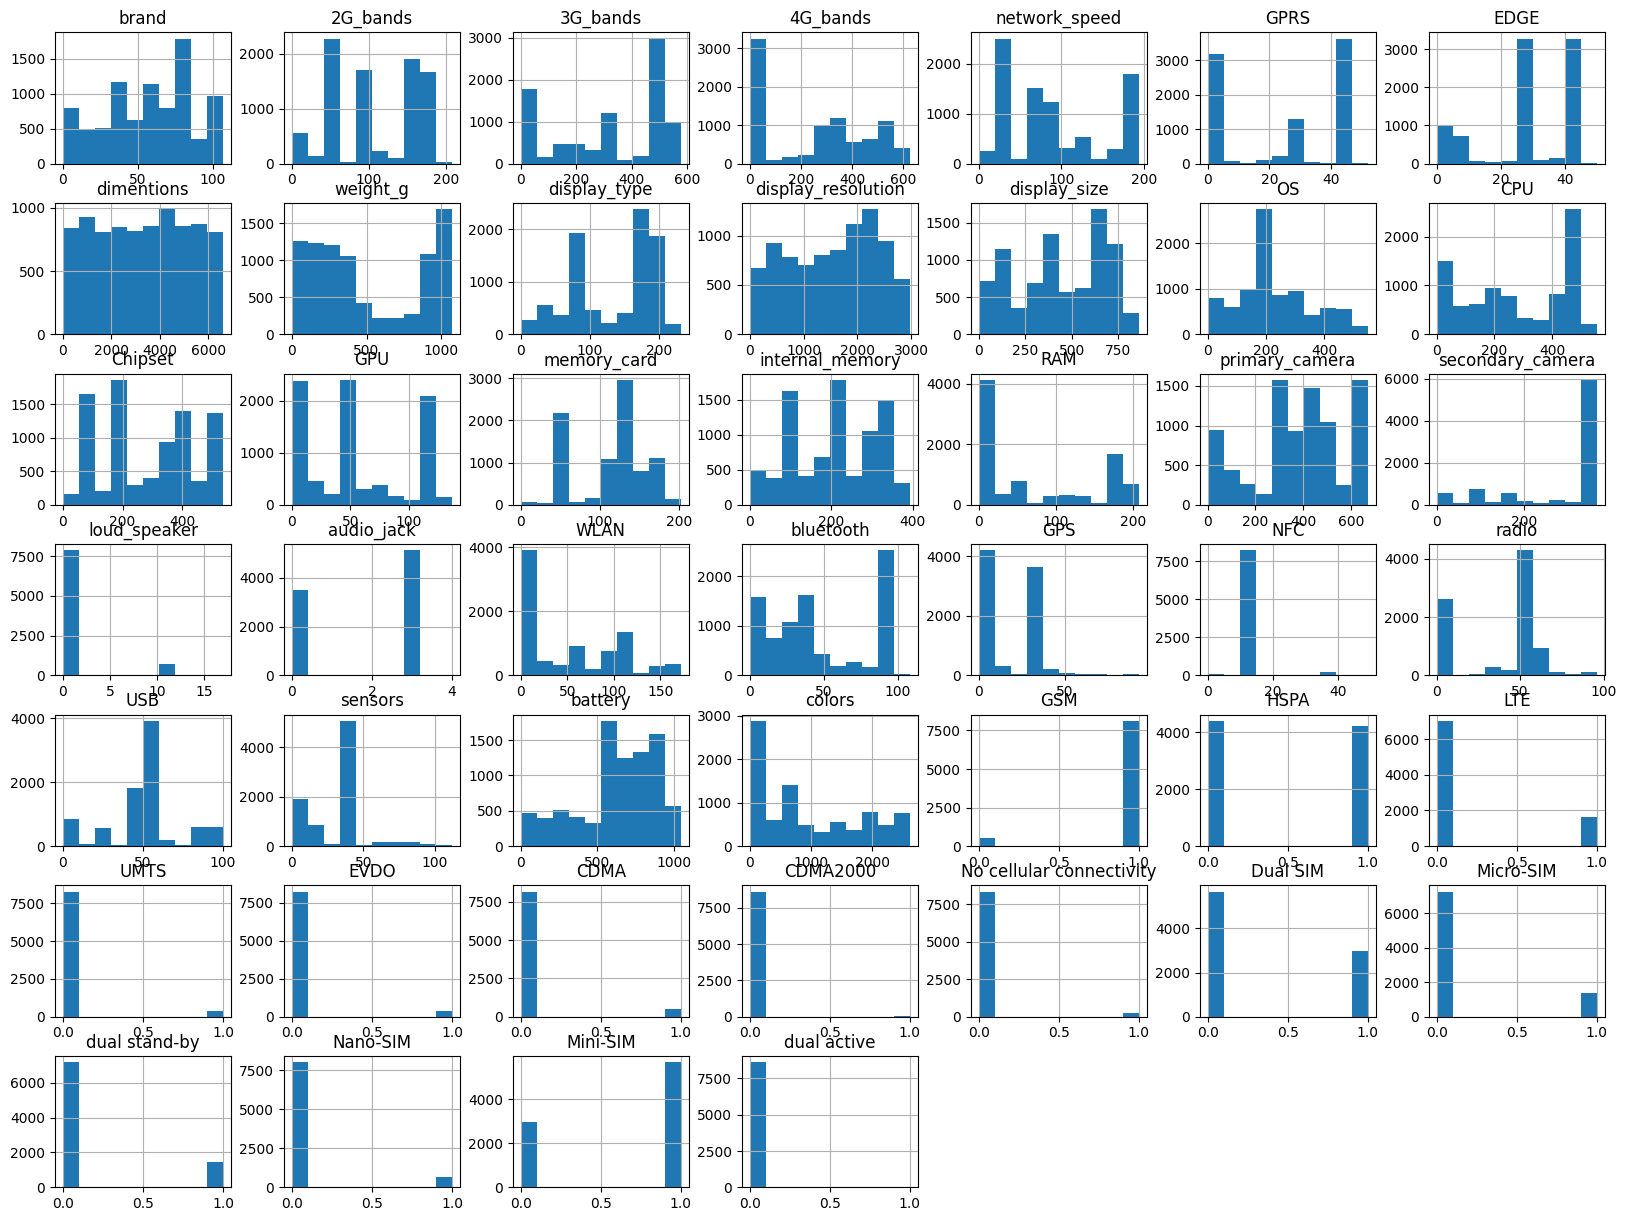

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
Feature_onehot.hist(bins=10, figsize=(20,15))
plt.show()

<Axes: >

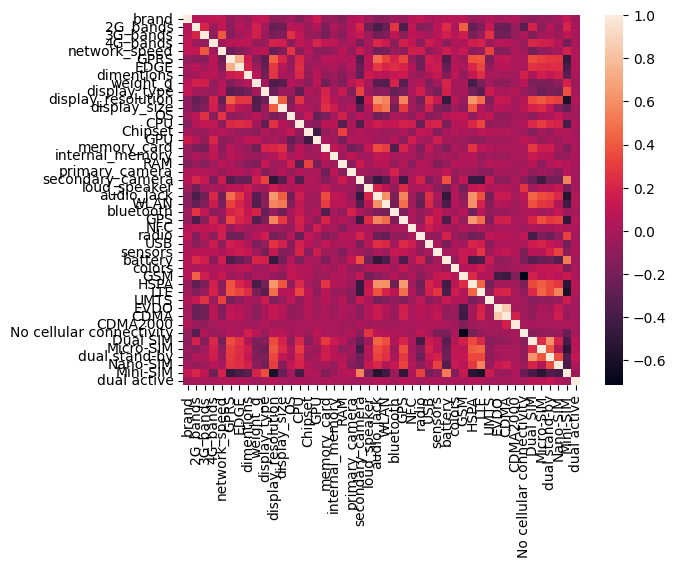

In [42]:
import seaborn as sns
corr = Feature_onehot.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#Preparing the data

We will split the data into train_set and test_set. We will use 70% for train_set and 30% for test_set. We will keep the test_set aside in order to test our model, but before that , lets try to scale the data as it is proofed that some algorithms perform well on scaled data. In addition, we will keep a copy of data non scaled in order to try it with algorithms which don't perform well on scaled data


In [43]:
Feature_onehot

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,1,101,226,388,104,45,43,5101,553,77,2853,720,280,458,260,75,98,101,56,82,98,1,3,32,40,37,10,2,53,38,237,221,1,1,1,0,0,0,0,0,1,1,0,1,0,0
1,1,109,5,0,123,45,43,4742,402,77,2588,55,280,394,220,78,129,194,112,83,155,1,3,98,40,28,10,2,53,78,988,658,1,1,1,0,0,0,0,0,1,1,1,0,0,0
2,1,109,5,0,26,45,43,3587,289,77,2300,736,280,455,209,75,117,347,3,513,83,1,3,161,94,28,10,2,53,38,673,658,1,1,1,0,0,0,0,0,1,1,1,0,0,0
3,1,5,479,0,22,28,29,5384,289,77,578,347,280,458,243,73,118,103,56,410,83,16,3,26,94,28,10,50,53,0,329,221,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,43,471,33,123,45,43,4718,386,77,2562,729,262,394,220,79,133,194,112,101,45,1,3,112,48,28,10,2,53,42,987,495,1,1,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,101,43,574,0,194,1,0,346,1004,180,1161,413,98,448,387,13,167,83,3,360,366,1,0,0,20,9,10,2,4,42,821,221,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8627,101,43,574,0,194,1,0,623,1004,180,685,308,98,448,387,13,167,83,3,272,366,1,0,0,20,9,10,2,4,42,524,623,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8628,101,43,574,0,194,1,0,623,1004,180,685,308,98,448,387,13,167,83,3,272,366,1,0,0,20,9,10,2,4,42,524,2540,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8629,101,43,574,0,194,1,0,623,1004,180,685,308,98,448,387,13,167,83,3,272,366,1,0,0,20,9,10,2,4,42,524,2540,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [44]:
Target

,approx_price_EUR
0,5.135798
1,5.521461
2,4.787492
3,5.438079
4,5.438079
...,...
8626,5.298317
8627,5.298317
8628,5.298317
8629,5.298317


In [45]:
# separating data to train and test
X_train, X_test, y_train, y_test=train_test_split(Feature_onehot,Target,test_size=0.30, random_state = 10)

scaler = preprocessing.StandardScaler()
train_feature_scaled = scaler.fit_transform(X_train)
test_feature_scaled = scaler.transform(X_test)
train_feature_scaled_df = pd.DataFrame(data=train_feature_scaled, index=list(range(len(train_feature_scaled))), columns=Feature_onehot.columns)
test_feature_scaled_df = pd.DataFrame(data=test_feature_scaled, index=list(range(len(test_feature_scaled))), columns=Feature_onehot.columns)

In [46]:
train_feature_scaled_df.head()

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,-0.802365,0.049385,-0.166613,-0.039780,0.667621,1.023145,0.943439,0.485900,-0.608463,-0.847600,1.136388,-1.668486,0.436923,0.661736,-1.354288,0.940938,0.311257,-0.119645,0.564922,1.122777,0.405383,-0.250987,0.823819,-0.629560,0.879131,1.966180,1.869361,0.492086,-0.906354,2.506571,-1.566127,0.066326,0.256531,1.019221,2.092688,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.391690,-0.436823,2.234515,3.607803,-1.370915,-0.051533
1,1.122638,-0.088844,-0.492581,1.059579,-0.271857,0.290876,0.532751,0.397077,-1.148324,-0.932072,0.985979,1.249624,-0.240128,1.054714,-1.302510,0.123910,0.383681,1.325281,-0.897819,-1.712115,-1.215825,3.176260,0.823819,0.074686,-0.263196,0.566646,-0.171189,-1.422459,1.510124,-1.509196,-2.324353,-0.294181,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.391690,-0.436823,2.234515,-0.277177,-1.370915,-0.051533
2,0.632637,-1.091004,0.816466,0.135748,-1.115794,1.023145,0.943439,0.957509,0.306833,0.993888,1.522640,1.034424,-0.264309,1.054714,-1.302510,1.445573,0.407823,1.325281,-0.897819,-0.525532,-1.734976,-0.250987,0.823819,0.871597,-0.263196,5.133545,-0.171189,0.492086,0.187900,-1.509196,-1.451822,1.778113,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.718551,2.289258,-0.447524,-0.277177,-1.370915,-0.051533
3,0.842638,0.740529,-0.089001,-0.289214,0.492464,0.133962,-0.014832,1.439163,1.457805,-1.101015,1.121949,1.705848,0.396623,0.384340,0.949829,-0.861330,-1.378643,-1.167925,-0.897819,-0.153173,0.623972,-0.250987,-1.214416,-0.944617,1.280489,-0.832887,-0.171189,0.492086,0.187900,0.451993,1.508687,-0.399847,0.256531,-0.981141,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.718551,-0.436823,-0.447524,-0.277177,0.729440,-0.051533
4,0.912638,0.740529,-1.496357,-1.134520,-1.115794,1.023145,0.943439,-1.207554,1.389294,1.281093,0.024560,0.014377,-0.594774,-0.286035,-0.797675,-0.140422,1.228631,0.607540,-0.897819,-0.088631,0.569325,-0.250987,0.823819,0.167350,-0.880670,-0.832887,-0.171189,0.133109,-2.046202,-1.509196,-0.400213,1.663745,0.256531,-0.981141,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.718551,-0.436823,-0.447524,-0.277177,0.729440,-0.051533


In [47]:
test_feature_scaled_df.head()

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,-1.642367,1.224331,1.266613,1.456826,1.623021,-1.069052,-0.014832,1.484103,1.361890,0.656000,-1.009055,-0.592487,-0.240128,1.008481,1.590581,-1.029541,-0.195713,0.626428,-0.193044,-1.821341,0.842562,-0.250987,-1.214416,-0.944617,-1.282028,-0.832887,-0.171189,0.492086,-2.091796,-0.481907,0.914299,-0.943094,0.256531,-0.981141,-0.477854,4.763423,-0.2163,-0.243829,-0.065746,-0.18552,-0.718551,-0.436823,-0.447524,-0.277177,0.729440,-0.051533
1,1.367639,1.379838,-1.496357,1.438350,-0.271857,1.023145,0.943439,0.227362,-1.011303,-0.932072,1.023280,1.249624,-0.240128,-0.043313,-0.571147,0.123910,0.383681,1.325281,-0.193044,0.670982,-1.734976,-0.250987,0.823819,1.131056,-0.263196,0.566646,-0.171189,-1.422459,1.510124,-0.481907,1.272456,-0.399847,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.391690,-0.436823,-0.447524,-0.277177,-1.370915,-0.051533
2,0.282637,-0.088844,0.816466,1.438350,-1.115794,1.023145,0.943439,0.418226,-1.115439,-0.932072,0.978759,0.832136,-0.401331,1.008481,1.053385,-1.101632,0.407823,0.135342,-0.897819,0.670982,-2.299666,-0.250987,0.823819,1.131056,-0.602806,0.566646,-0.171189,-1.422459,0.187900,0.265213,0.167504,-0.399847,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.391690,-0.436823,-0.447524,-0.277177,-1.370915,-0.051533
3,1.577639,0.740529,0.816466,0.657712,-0.271857,0.133962,-0.014832,1.602534,1.126215,-1.574058,0.223101,-1.801910,-0.240128,-0.858165,0.600328,1.349452,-1.378643,0.135342,-0.897819,1.385911,0.569325,-0.593712,-1.214416,-0.944617,1.280489,-0.832887,-0.171189,0.492086,-1.134323,0.451993,0.518040,0.409429,0.256531,-0.981141,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.718551,-0.436823,-0.447524,-0.277177,0.729440,-0.051533
4,-0.522365,1.016987,0.816466,1.438350,-0.940637,1.023145,0.943439,0.086725,-0.764666,0.993888,0.699599,0.849352,0.412743,1.152958,-0.525841,-0.140422,0.383681,1.325281,-0.897819,0.258904,-0.887940,-0.250987,0.823819,1.131056,-0.263196,0.566646,-0.171189,-1.422459,0.187900,-1.509196,-2.328163,-0.399847,0.256531,1.019221,2.092688,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.391690,-0.436823,-0.447524,-0.277177,-1.370915,-0.051533


#Select the model and Evaluate

In [48]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

colnames = Feature_onehot.columns

lr = LinearRegression()
lr.fit(train_feature_scaled_df,y_train)
rfe = RFE(lr, n_features_to_select=5, verbose =3 )
rfe.fit(train_feature_scaled_df,y_train)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames)

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

In [51]:
lr_pred = lr.predict(test_feature_scaled)
r2_score(y_test, lr_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.4283498963957334

In [52]:
ranks

{'RFE': {'brand': np.float64(0.17),
  '2G_bands': np.float64(0.9),
  '3G_bands': np.float64(0.95),
  '4G_bands': np.float64(0.34),
  'network_speed': np.float64(0.41),
  'GPRS': np.float64(0.93),
  'EDGE': np.float64(0.98),
  'dimentions': np.float64(0.76),
  'weight_g': np.float64(0.15),
  'display_type': np.float64(0.83),
  'display_resolution': np.float64(0.07),
  'display_size': np.float64(0.56),
  'OS': np.float64(0.44),
  'CPU': np.float64(0.12),
  'Chipset': np.float64(0.49),
  'GPU': np.float64(0.63),
  'memory_card': np.float64(0.61),
  'internal_memory': np.float64(0.39),
  'RAM': np.float64(0.27),
  'primary_camera': np.float64(0.8),
  'secondary_camera': np.float64(0.2),
  'loud_speaker': np.float64(0.29),
  'audio_jack': np.float64(0.05),
  'WLAN': np.float64(0.54),
  'bluetooth': np.float64(0.1),
  'GPS': np.float64(0.0),
  'NFC': np.float64(0.24),
  'radio': np.float64(0.22),
  'USB': np.float64(0.66),
  'sensors': np.float64(0.32),
  'battery': np.float64(0.88),
  'colo

In [53]:
#Similarly It can be done with randomforestregressor model
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(train_feature_scaled_df,y_train)
ranks["RF"] = ranking(rf.feature_importances_, colnames)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.4s


building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.4s finished


In [54]:
ranks

{'RFE': {'brand': np.float64(0.17),
  '2G_bands': np.float64(0.9),
  '3G_bands': np.float64(0.95),
  '4G_bands': np.float64(0.34),
  'network_speed': np.float64(0.41),
  'GPRS': np.float64(0.93),
  'EDGE': np.float64(0.98),
  'dimentions': np.float64(0.76),
  'weight_g': np.float64(0.15),
  'display_type': np.float64(0.83),
  'display_resolution': np.float64(0.07),
  'display_size': np.float64(0.56),
  'OS': np.float64(0.44),
  'CPU': np.float64(0.12),
  'Chipset': np.float64(0.49),
  'GPU': np.float64(0.63),
  'memory_card': np.float64(0.61),
  'internal_memory': np.float64(0.39),
  'RAM': np.float64(0.27),
  'primary_camera': np.float64(0.8),
  'secondary_camera': np.float64(0.2),
  'loud_speaker': np.float64(0.29),
  'audio_jack': np.float64(0.05),
  'WLAN': np.float64(0.54),
  'bluetooth': np.float64(0.1),
  'GPS': np.float64(0.0),
  'NFC': np.float64(0.24),
  'radio': np.float64(0.22),
  'USB': np.float64(0.66),
  'sensors': np.float64(0.32),
  'battery': np.float64(0.88),
  'colo

In [55]:
#Now lets try out some more trees and ensemble methods for a better understanding of the feature importances

# the models we will run
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# some metrics to help us out
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [56]:
dr = DecisionTreeRegressor()
dr.fit(train_feature_scaled_df,y_train)
drimp = dr.feature_importances_


In [57]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(train_feature_scaled_df,y_train)
rfrimp = rfr.feature_importances_

In [58]:
gbr =  GradientBoostingRegressor(n_estimators=100)
gbr.fit(train_feature_scaled_df,y_train)
gbrimp = gbr.feature_importances_

In [59]:
abr =  AdaBoostRegressor(n_estimators=100)
abr.fit(train_feature_scaled_df,y_train)
abrimp = abr.feature_importances_

In [60]:
#lets create a data frame that has all these values
d = {'Decision Tree':drimp, 'Random Forest':rfrimp, 'Gradient Boost':gbrimp,'Ada boost':abrimp}

In [61]:
features = pd.DataFrame(data = d)
# lets check out features
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost
0,0.062458,0.053328,0.082986,0.040672
1,0.013211,0.013942,0.015490,0.100665
2,0.025351,0.022119,0.004939,0.021070
3,0.044281,0.042112,0.060264,0.035655
4,0.008151,0.010875,0.002191,0.005977


In [62]:
#One good way to check how important a feature is will be to calculate the mean from each method
features['mean'] = features.mean(axis= 1)
# we forgot to add the names of the features
features['names'] = train_feature_scaled_df.columns.values

In [63]:
#lets check it out now
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost,mean,names
0,0.062458,0.053328,0.082986,0.040672,0.059861,brand
1,0.013211,0.013942,0.015490,0.100665,0.035827,2G_bands
2,0.025351,0.022119,0.004939,0.021070,0.018370,3G_bands
3,0.044281,0.042112,0.060264,0.035655,0.045578,4G_bands
4,0.008151,0.010875,0.002191,0.005977,0.006798,network_speed


#RandomForestRegressor with GridSearchCV

In [64]:
param_grid=[
{'n_estimators':[3,10,30,40,50],	'max_features':[10,14,18]},
{'n_estimators':[3,10],'max_features':[14,18]}]
forest_reg=RandomForestRegressor(random_state=0,n_jobs=-1)
rnd_grid_search=GridSearchCV(forest_reg,param_grid,cv=5,return_train_score=True)
rnd_grid_search.fit(train_feature_scaled_df,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid=[{'max_features': [10, 14, 18],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'max_features': [14, 18], 'n_estimators': [3, 10]}],
             return_train_score=True)

In [65]:
rnd_grid_search.cv_results_['mean_test_score']



array([0.61004819, 0.70053492, 0.72641793, 0.72889534, 0.72990953,
       0.61965045, 0.70418493, 0.73092745, 0.73304392, 0.73436112,
       0.62157487, 0.70984778, 0.73186536, 0.73368169, 0.73546925,
       0.61965045, 0.70418493, 0.62157487, 0.70984778])

In [66]:
rnd_grid_search.cv_results_['mean_train_score']



array([0.89578555, 0.94193955, 0.95727448, 0.95870177, 0.96028464,
       0.89809138, 0.94409173, 0.95826494, 0.95955354, 0.96110843,
       0.89731584, 0.94343528, 0.95746735, 0.95888675, 0.96044764,
       0.89809138, 0.94409173, 0.89731584, 0.94343528])

In [67]:
rnd_grid_search.score(test_feature_scaled_df, y_test)



0.7364682095094998

In [68]:
rnd_grid_search.score(train_feature_scaled_df, y_train)



0.9623865914780281

In [69]:
y_pred=rnd_grid_search.predict(test_feature_scaled_df)
r2_score(y_test, y_pred)


0.7364682095094996

# Insights

#Linear Regression

Linear regression gave us a very bad r2 score.Lets try to plot the actual value and predicted value to see what is happening

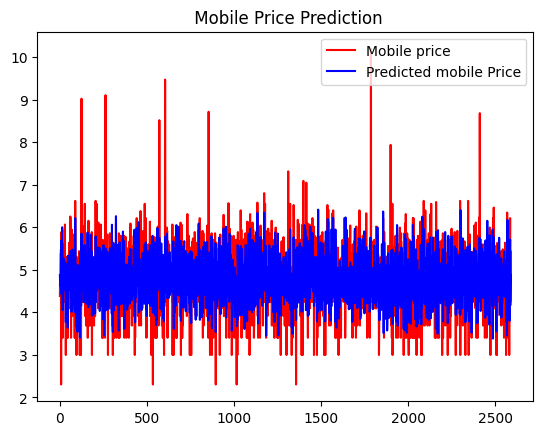

In [70]:
# Visualising the results
mobile_price_reg=lr.predict(test_feature_scaled_df)
plt.plot(y_test.values, color = 'red', label = 'Mobile price')
plt.plot(mobile_price_reg, color = 'blue', label = 'Predicted mobile Price')
plt.title(' Mobile Price Prediction')

plt.legend()
plt.show()



ok as we can see the model is not predicting very well because the model is too simple,lets try to plot residual(The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual)

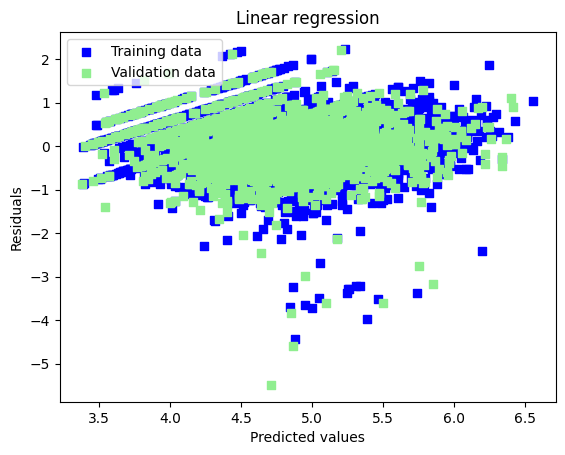

In [71]:
mobile_predictions_train=lr.predict(train_feature_scaled_df)
mobile_predictions_test=lr.predict(test_feature_scaled_df)
plt.scatter(mobile_predictions_train, mobile_predictions_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(mobile_predictions_test, mobile_predictions_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()



The residual plot shows a fairly random pattern,This random pattern indicates that a linear model provides a decent fit to the data. As we see here not exactly random that means our data is not purely linear

#RandomForestRegressor

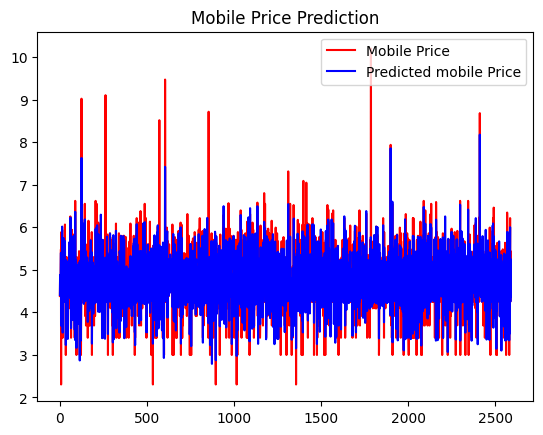

In [72]:
# Visualising the results
mobile_prediction_forest_reg = RandomForestRegressor()
forest_reg = mobile_prediction_forest_reg.fit(train_feature_scaled_df,y_train)

mobile_predictions_forest_reg_clf=forest_reg.predict(test_feature_scaled_df)
plt.plot(y_test.values, color = 'red', label = 'Mobile Price')
plt.plot(mobile_predictions_forest_reg_clf, color = 'blue', label = 'Predicted mobile Price')
plt.title('Mobile Price Prediction')

plt.legend()
plt.show()



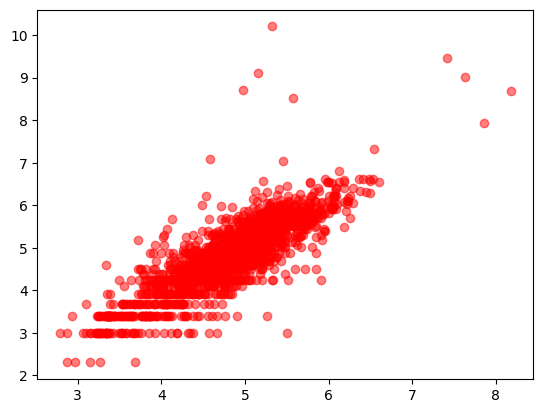

In [73]:
#plotting a scatter plot between the real price  values and predict price  values

plt.scatter(mobile_predictions_forest_reg_clf, y_test.values, c='red', alpha=0.5)
plt.show()



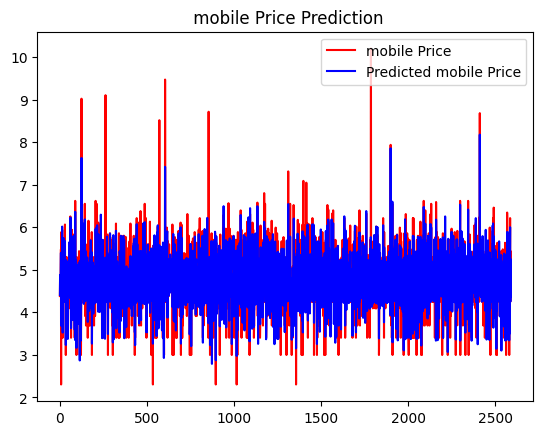

In [74]:
# Visualising the results
mobile_predictions_rnd_grid_search=rnd_grid_search.predict(test_feature_scaled_df)
plt.plot(y_test.values, color = 'red', label = 'mobile Price')
plt.plot(mobile_predictions_forest_reg_clf, color = 'blue', label = 'Predicted mobile Price')
plt.title(' mobile Price Prediction')

plt.legend()
plt.show()



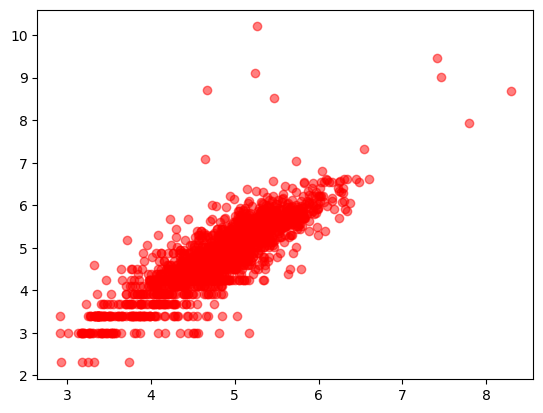

In [75]:
#plotting a scatter plot between the real price  values and predict price  values

plt.scatter(mobile_predictions_rnd_grid_search, y_test.values, c='red', alpha=0.5)
plt.show()



In [76]:
rnd_grid_search.best_estimator_



RandomForestRegressor(max_features=18, n_estimators=50, n_jobs=-1,
                      random_state=0)